In [110]:
%autosave 60

Autosaving every 60 seconds


In [176]:
%run init.ipynb
%run init-tensor_product.ipynb
%run init-quantum_resources.ipynb
%run init-optical_elements.ipynb

In [112]:
from qiskit.quantum_info import entropy, DensityMatrix

In [113]:
%run init-qiskit.ipynb

ibmqfactory.load_account:WARNING:2023-04-28 07:37:54,303: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2023-04-28 07:37:58,746: Credentials are already in use. The existing account in the session will be replaced.


ibm_oslo                     ibm_perth                    ibm_nairobi
--------                     ---------                    -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 29             Pending Jobs: 398            Pending Jobs: 55
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      130.1          Avg. T1:      138.2          Avg. T1:      89.6
Avg. T2:      92.2           Avg. T2:      116.3          Avg. T2:      47.2



ibm_lagos                    ibmq_manila                  ibmq_jakarta
---------                    -----------                  ------------
Num. Qubits:  7              Num. Qubits:  5              Num. Qubits:  7
Pending Jobs: 54             Pending Jobs: 72             Pending Jobs: 185
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           

In [114]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.2', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.1', 'qiskit-aqua': None, 'qiskit': '0.36.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [115]:
%run init-qiskit_optical_elements.ipynb

# Irrealidade do caminho $b$ dentro do IMZ

## BBO$_{p}$ - Dentro do IMZ - QWP$_{in}$

In [201]:
thmax = math.pi-0.01;   dth = thmax/20; th = np.arange(0.01, thmax+dth, dth); d = th.shape[0]
rhob_AbWZ_in             = np.zeros(th.shape[0], dtype=object)
rhob_AbWZ_out            = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_in             = np.zeros(th.shape[0], dtype=object)
rhob_0bWZ_out            = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_in            = np.zeros(th.shape[0], dtype=object)
Phi_b_0bWZ_out           = np.zeros(th.shape[0], dtype=object)
Irr_b_in                 = np.zeros(th.shape[0])
Irr_b_out                = np.zeros(th.shape[0])

<img src = 'setup_realism.jpg' width = '90%'>

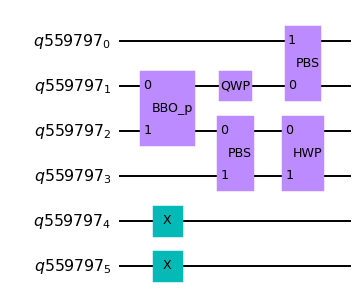

In [202]:
def qc_QCRb_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                            # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5)                                                           # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_in_ = qc_QCRb_in(math.pi); qc_QCRb_in_.draw(output = 'mpl', scale = 0.7)

In [203]:
for j in range(0, d):
    #
    # Circuito - Quantum Entangled Eraser
    #
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_in_ = qc_QCRb_in(th[j]); qc.append(qc_QCRb_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomografia
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhob_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.01
j =  1  - theta = 0.16657963267948966
j =  2  - theta = 0.3231592653589793
j =  3  - theta = 0.479738898038469
j =  4  - theta = 0.6363185307179586
j =  5  - theta = 0.7928981633974483
j =  6  - theta = 0.9494777960769379
j =  7  - theta = 1.1060574287564275
j =  8  - theta = 1.2626370614359173
j =  9  - theta = 1.419216694115407
j = 10  - theta = 1.5757963267948967
j = 11  - theta = 1.7323759594743862
j = 12  - theta = 1.8889555921538759
j = 13  - theta = 2.0455352248333654
j = 14  - theta = 2.202114857512855
j = 15  - theta = 2.358694490192345
j = 16  - theta = 2.5152741228718343
j = 17  - theta = 2.6718537555513238
j = 18  - theta = 2.8284333882308137
j = 19  - theta = 2.985013020910303
j = 20  - theta = 3.141592653589793


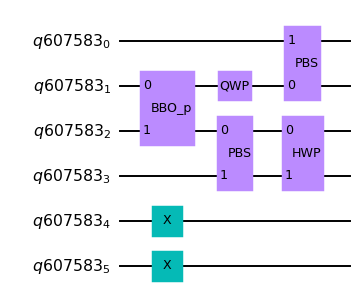

In [204]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

In [217]:
rhob_AbWZ_in[10]

array([[ 2.03189087e-04+0.00000000e+00j,  1.61529535e-04-2.13001736e-04j,
        -1.71422399e-06-7.80990062e-05j, -1.38591265e-04+8.90317754e-05j,
        -8.13170299e-05-1.73810581e-04j,  5.44919778e-06-1.46784949e-04j,
        -1.14408775e-04+5.90830656e-05j,  1.56217199e-04-4.89681826e-04j,
        -1.27063502e-04+1.19452720e-04j, -3.10702338e-05-8.20597956e-05j,
         2.85227684e-05+2.76278563e-05j, -2.85912488e-04-4.43330332e-04j,
         4.83550768e-06-1.29777293e-04j,  1.41160025e-04-4.98955271e-05j,
        -2.29509331e-05+9.42283561e-05j,  5.76741734e-04+3.92657296e-04j],
       [ 1.61529535e-04+2.13001736e-04j,  8.20550606e-04+0.00000000e+00j,
         3.34418335e-04-1.51615072e-04j,  5.23079986e-04+7.00583221e-04j,
         9.63199438e-05-2.32053242e-04j,  5.54686558e-04-3.49469172e-05j,
        -4.82684177e-04-3.47110237e-04j,  1.47951572e-03-8.59652515e-04j,
        -2.36456669e-04-5.66425067e-05j, -4.85986283e-05+1.94357883e-04j,
        -2.65907898e-04-5.90144346e-0

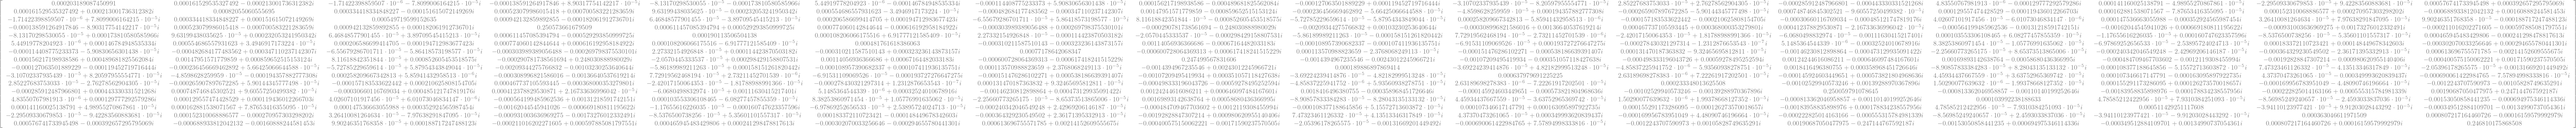

In [213]:
sympy.Matrix(rhob_AbWZ_in[10])

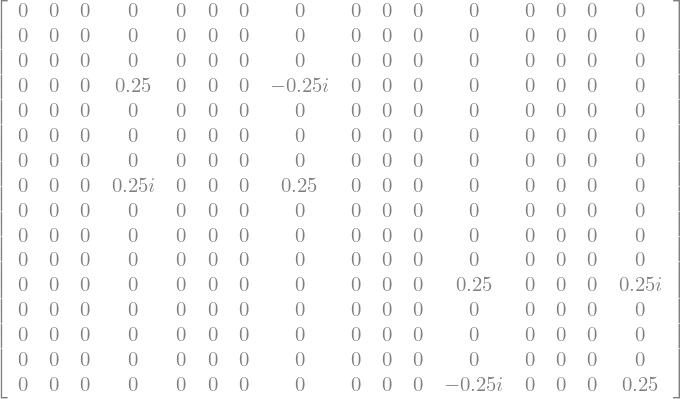

In [214]:
sympy.Matrix(rhob_AbWZ_in[10]).applyfunc(lambda x: round(x, 2))

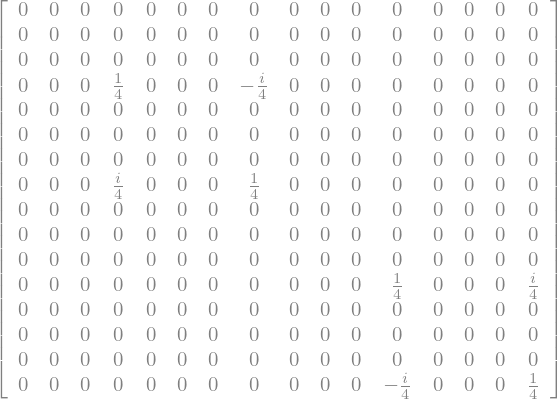

In [18]:
mysim(ρ2p_AbWZ_trBa_in).subs(cp, 1/sqrt(2)).subs(cm, 1/sqrt(2))

## BBO$_{p}$ - Dentro do IMZ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

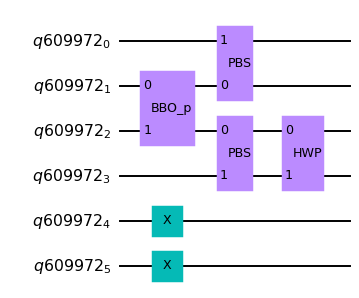

In [205]:
def qc_QCRb_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])              # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                      # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                      # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                      # HWP
    qc.x(4); qc.x(5) # Atoms's innitial state
    #qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    #qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                            # Phase
    #qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRb_out_ = qc_QCRb_out(math.pi); qc_QCRb_out_.draw(output = 'mpl', scale = 0.7)

In [206]:
for j in range(0,d):
    #
    # Circuito - Quantum Entangled Eraser
    #
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRb_out_ = qc_QCRb_out(th[j]); qc.append(qc_QCRb_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomografia
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhob_AbWZ_out[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.01
j =  1  - theta = 0.16657963267948966
j =  2  - theta = 0.3231592653589793
j =  3  - theta = 0.479738898038469
j =  4  - theta = 0.6363185307179586
j =  5  - theta = 0.7928981633974483
j =  6  - theta = 0.9494777960769379
j =  7  - theta = 1.1060574287564275
j =  8  - theta = 1.2626370614359173
j =  9  - theta = 1.419216694115407
j = 10  - theta = 1.5757963267948967
j = 11  - theta = 1.7323759594743862
j = 12  - theta = 1.8889555921538759
j = 13  - theta = 2.0455352248333654
j = 14  - theta = 2.202114857512855
j = 15  - theta = 2.358694490192345
j = 16  - theta = 2.5152741228718343
j = 17  - theta = 2.6718537555513238
j = 18  - theta = 2.8284333882308137
j = 19  - theta = 2.985013020910303
j = 20  - theta = 3.141592653589793


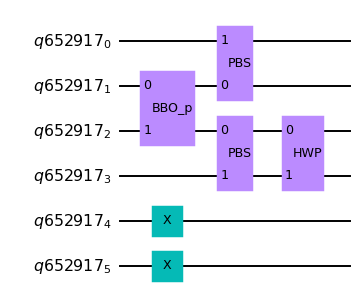

In [207]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

In [215]:
mbk(sympy.Matrix(rhob_AbWZ_out[10]).applyfunc(lambda x: round(x, 2)))

In [77]:
mysim(mbk(ρ2p_AbWZ_trBa_out))

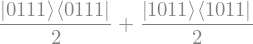

In [78]:
mysim(mbk(ρ2p_AbWZ_trBa_out)).subs(cp, 1/sqrt(2)).subs(cm, 1/sqrt(2))

### Cálculos

#### QWP$_{in}$

In [208]:
for j in range(0,d):
    rhob_0bWZ_in[j] = projM_np(8, '0', rhob_AbWZ_in[j])
    Phi_b_0bWZ_in[j] = dephasing_map_3qubits_np(rhob_0bWZ_in[j])
    Irr_b_in[j] = entropy(Phi_b_0bWZ_in[j]) - entropy(rhob_0bWZ_in[j])
    print(Irr_b_in[j])

0.004008046420984658
0.061431580030468974
0.1657641540036941
0.3114299156239183
0.4444758947116499
0.600642250834257
0.7178451888697669
0.8205090963957146
0.9218430508421417
0.96648263862857
0.981158980146591
0.9692611507402475
0.8988589765145844
0.8248966309050711
0.7199982361477077
0.5706409637979686
0.44472221874674533
0.299835491320547
0.1585249585249181
0.055303911127661365
0.002839032776378793


#### QWP$_{out}$

In [209]:
for j in range(0,d):
    rhob_0bWZ_out[j] = projM_np(8, '0', rhob_AbWZ_out[j])
    Phi_b_0bWZ_out[j] = dephasing_map_3qubits_np(rhob_0bWZ_out[j])
    Irr_b_out[j] = entropy(Phi_b_0bWZ_out[j]) - entropy(rhob_0bWZ_out[j])
    print(Irr_b_out[j])

0.0025093586674988337
0.0022181402517074122
0.0022392108123507545
0.0034413925196606077
0.0025659587856010704
0.002742851565856602
0.003093468810159712
0.004063306511655922
0.003947519200711742
0.005123590704558562
0.007355815087005793
0.005860382469086101
0.00727344192883457
0.00908208419089282
0.013397947064784754
0.012690661406960763
0.018103457151754515
0.0296439488422498
0.06500798901190019
0.1498459040981508
0.3396727521605142


#### Gráficos

<Figure size 500x400 with 0 Axes>

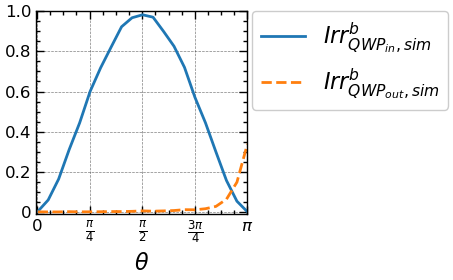

In [211]:
import string
plt.figure(figsize = (5,4), constrained_layout = True)
plt.subplots(figsize=(7, 3))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th, Irr_b_in, '-' , color='#1f77b4', label = r'$Irr_{QWP_{in}, sim}^{b}$')
plt.plot(th, Irr_b_out, '--', color='#ff7f0e', label = r'$Irr_{QWP_{out},sim}^{b}$')
#
#
#
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]#, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']#, r'$\frac{5\pi}{4}$',  r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()

# Irrealidade dos átomos fora do IMZ

## BBO$_{p}$ - QWP$_{in}$

In [167]:
thmax = math.pi;   dth = thmax/20; th = np.arange(0, thmax+dth, dth); d = th.shape[0]
rhoWZ_AbWZ_in            = np.zeros(th.shape[0], dtype=object)
rhoWZ_AbWZ_out           = np.zeros(th.shape[0], dtype=object)
rhoWZ_00WZ_in            = np.zeros(th.shape[0], dtype=object)
rhoWZ_00WZ_out           = np.zeros(th.shape[0], dtype=object)
Phi_WZ_00WZ_in           = np.zeros(th.shape[0], dtype=object)
Phi_WZ_00WZ_out          = np.zeros(th.shape[0], dtype=object)
Irr_WZ_in                = np.zeros(th.shape[0])
Irr_WZ_out               = np.zeros(th.shape[0])

<img src = 'setup_realism.jpg' width = '90%'>

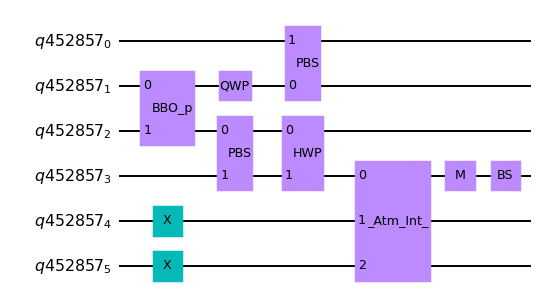

In [169]:
def qc_QCRWZ_in(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                           # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_in_ = qc_QCRWZ_in(math.pi); qc_QCRWZ_in_.draw(output = 'mpl', scale = 0.7)

In [170]:
for j in range(0,d):
    #
    # Circuito - Quantum Entangled Eraser
    #
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRWZ_in_ = qc_QCRWZ_in(th[j]); qc.append(qc_QCRWZ_in_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomografia
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhoWZ_AbWZ_in[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.0
j =  1  - theta = 0.15707963267948966
j =  2  - theta = 0.3141592653589793
j =  3  - theta = 0.47123889803846897
j =  4  - theta = 0.6283185307179586
j =  5  - theta = 0.7853981633974483
j =  6  - theta = 0.9424777960769379
j =  7  - theta = 1.0995574287564276
j =  8  - theta = 1.2566370614359172
j =  9  - theta = 1.413716694115407
j = 10  - theta = 1.5707963267948966
j = 11  - theta = 1.7278759594743862
j = 12  - theta = 1.8849555921538759
j = 13  - theta = 2.0420352248333655
j = 14  - theta = 2.199114857512855
j = 15  - theta = 2.356194490192345
j = 16  - theta = 2.5132741228718345
j = 17  - theta = 2.670353755551324
j = 18  - theta = 2.827433388230814
j = 19  - theta = 2.9845130209103035
j = 20  - theta = 3.141592653589793


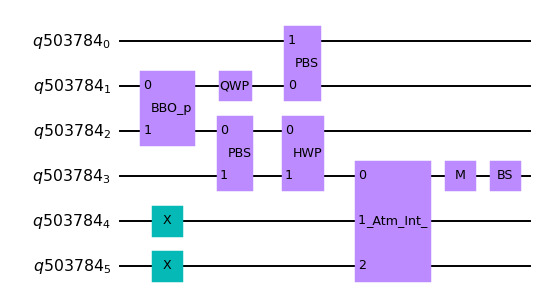

In [171]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

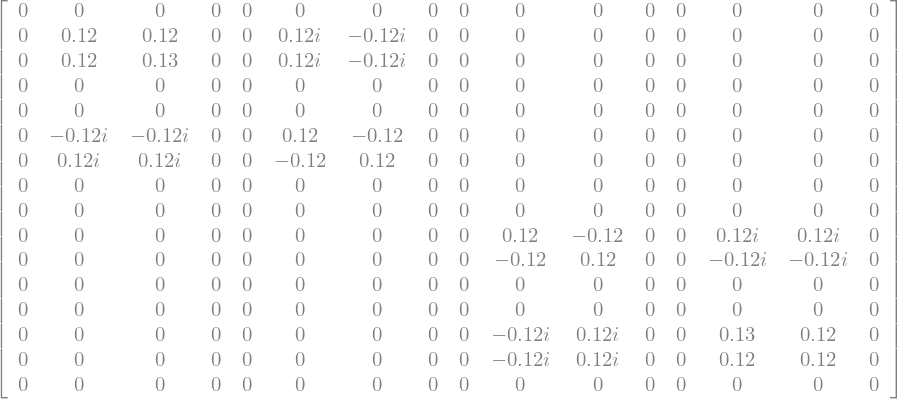

In [116]:
sympy.Matrix(rhoWZ_AbWZ_in[10]).applyfunc(lambda x: round(x, 2))

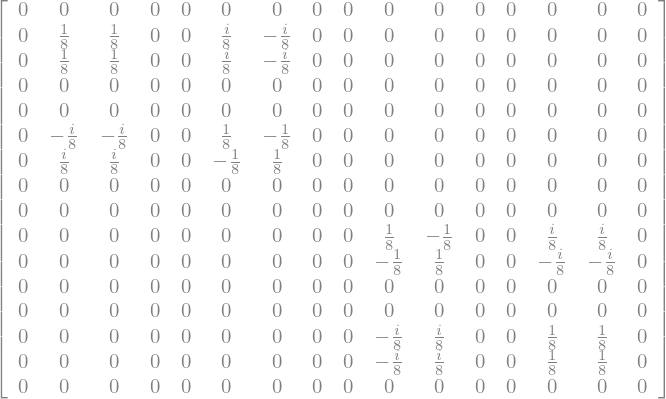

In [80]:
mysim(ρ5p_AbWZ_trBa_in).subs(cp, 1/sqrt(2)).subs(cm, 1/sqrt(2))

## BBO$_{p}$ - QWP$_{out}$

<img src = 'setup_realism.jpg' width = '90%'>

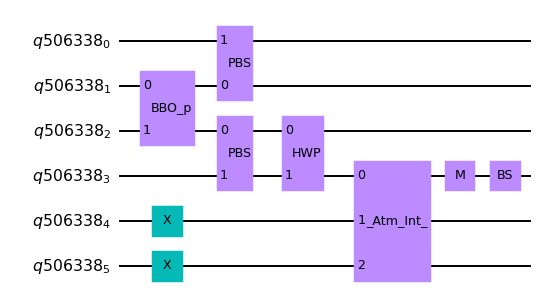

In [172]:
def qc_QCRWZ_out(th):
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr, name = 'QCR')
    qc_BBO_p_ = qc_BBO_p(th); qc.append(qc_BBO_p_, [qr[1],qr[2]])             # BBO_p
    #qc_QWP_ = qc_QWP(); qc.append(qc_QWP_, [qr[1]])                          # QWP
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[1],qr[0]])                     # PBS_A
    # IMZ
    qc_PBS_ = qc_PBS(); qc.append(qc_PBS_, [qr[2],qr[3]])                     # PBS
    qc_HWP_ = qc_HWP(); qc.append(qc_HWP_, [qr[2],qr[3]])                     # HWP
    qc.x(4); qc.x(5)                                                          # Atoms's initial state
    qc_AtmInt_ = qc_AtmInt(); qc.append(qc_AtmInt_, [qr[3],qr[4],qr[5]])      # Atoms' interaction
    qc_M_ = qc_M(); qc.append(qc_M_, [qr[3]])                                 # Mirrors
    #qc_PS_ = qc_PS(ph); qc.append(qc_PS_, [qr[3]])                           # Phase
    qc_BS_ = qc_BS(); qc.append(qc_BS_, [qr[3]])                              # BS
    return qc
qc_QCRWZ_out_ = qc_QCRWZ_out(math.pi); qc_QCRWZ_out_.draw(output = 'mpl', scale = 0.7)

In [173]:
for j in range(0,d):
    #
    # Circuito - Quantum Entangled Eraser
    #
    qr = qiskit.QuantumRegister(6); qc = qiskit.QuantumCircuit(qr)
    #
    # Circuito
    #
    qc_QCRWZ_out_ = qc_QCRWZ_out(th[j]); qc.append(qc_QCRWZ_out_, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5]])
    #
    # Tomografia
    #
    qstc = state_tomography_circuits(qc, [qr[5],qr[4],qr[3],qr[1]])  # rho_AbWZ qr[5],qr[4],qr[3],qr[1]
    job = qiskit.execute(qstc, backend = simulator, shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc)
    #
    # rho
    #
    rhoWZ_AbWZ_out[j] = qstf.fit(method='lstsq')
    print('j = {:2d}  - theta = {}'.format(j, th[j]))

j =  0  - theta = 0.0
j =  1  - theta = 0.15707963267948966
j =  2  - theta = 0.3141592653589793
j =  3  - theta = 0.47123889803846897
j =  4  - theta = 0.6283185307179586
j =  5  - theta = 0.7853981633974483
j =  6  - theta = 0.9424777960769379
j =  7  - theta = 1.0995574287564276
j =  8  - theta = 1.2566370614359172
j =  9  - theta = 1.413716694115407
j = 10  - theta = 1.5707963267948966
j = 11  - theta = 1.7278759594743862
j = 12  - theta = 1.8849555921538759
j = 13  - theta = 2.0420352248333655
j = 14  - theta = 2.199114857512855
j = 15  - theta = 2.356194490192345
j = 16  - theta = 2.5132741228718345
j = 17  - theta = 2.670353755551324
j = 18  - theta = 2.827433388230814
j = 19  - theta = 2.9845130209103035
j = 20  - theta = 3.141592653589793


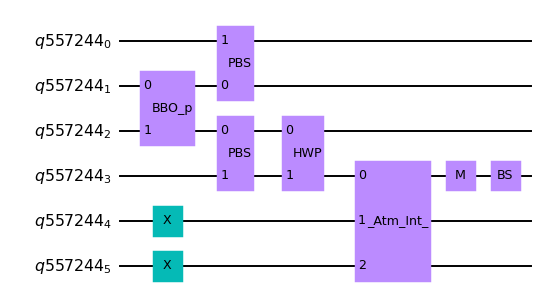

In [174]:
qc.decompose().draw(output = 'mpl', scale = 0.7)

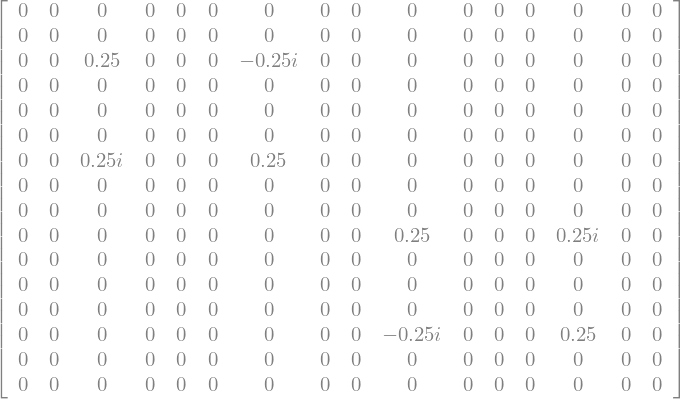

In [112]:
sympy.Matrix(rhoWZ_AbWZ_out[10]).applyfunc(lambda x: round(x, 2))

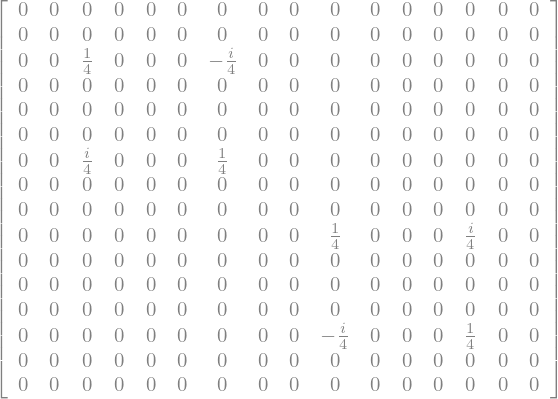

In [82]:
mysim(ρ5p_AbWZ_trBa_out).subs(cp, 1/sqrt(2)).subs(cm, 1/sqrt(2))

### Cálculos

#### QWP$_{in}$

In [177]:
for j in range(0,d):
    rhoWZ_00WZ_in[j] = projM_np(4, '00', rhoWZ_AbWZ_in[j])
    Phi_WZ_00WZ_in[j] = dephasing_map_2qubits_np(rhoWZ_00WZ_in[j])
    Irr_WZ_in[j] = entropy(Phi_WZ_00WZ_in[j]) - entropy(rhoWZ_00WZ_in[j])
    print(Irr_WZ_in[j])

0.004325927748695391
0.05113176395672466
0.15835332130887522
0.31137629046444487
0.43681658907091825
0.5848442996028216
0.7144903408442858
0.8282827414037481
0.9071111687200537
0.9598099605188584
0.975783469749111
0.945341885708357
0.9084201908393299
0.8245417296639611
0.7196342438026726
0.5697583129923672
0.43827761145959737
0.29219185582206536
0.1710241578674859
0.04708708355797023
0.0020821301580695104


#### QWP$_{out}$

In [178]:
for j in range(0,d):
    rhoWZ_00WZ_out[j] = projM_np(4, '00', rhoWZ_AbWZ_out[j])
    Phi_WZ_00WZ_out[j] = dephasing_map_2qubits_np(rhoWZ_00WZ_out[j])
    Irr_WZ_out[j] = entropy(Phi_WZ_00WZ_out[j]) - entropy(rhoWZ_00WZ_out[j])
    print(Irr_WZ_out[j])

0.0010520747505469545
0.0017495575105374306
0.001808178547955206
0.0008501537559841219
0.0009668488292749432
0.001809020037191772
0.0011846098044296788
0.0027024666168338
0.0061280958210851305
0.0030249872135656303
0.006165838678996324
0.002463363378132147
0.0035201932678430997
0.0058944791501474025
0.00888852362194753
0.009142934203283437
0.01481961370484386
0.03279428985880822
0.07194539176124903
0.1153859463050868
0.7660459575379539


<Figure size 500x400 with 0 Axes>

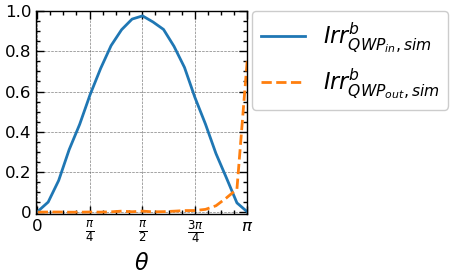

In [212]:
import string
plt.figure(figsize = (5,4), constrained_layout = True)
plt.subplots(figsize=(7, 3))
font = {'family': 'Verdana', 'color':  'black', 'size': 20}
#
plt.style.use(['science', 'notebook', 'grid'])
ax0 = plt.subplot(121)
plt.gca().set_xlim([-0.01,3.14])
plt.gca().set_ylim([-0.01,0.52])
#
# simulation
#
plt.plot(th, Irr_WZ_in, '-' , color='#1f77b4', label = r'$Irr_{QWP_{in}, sim}^{b}$')
plt.plot(th, Irr_WZ_out, '--', color='#ff7f0e', label = r'$Irr_{QWP_{out},sim}^{b}$')
#
#
#
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel(r'$\theta$')
tick_posx= [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]#, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
labelsx = ['0', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']#, r'$\frac{5\pi}{4}$',  r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
tick_posy= [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labelsy = ['0', '0.2', '0.4', '0.6', '0.8', '1.0']
#tick_posx= [0, 5]
#labelsx = ['0', '5']
plt.xticks(tick_posx, labelsx)
plt.yticks(tick_posy, labelsy)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.tick_params('y', labelleft=False)
#ax1.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax1.transAxes, 
#            size=20, weight='bold')
#
plt.tight_layout()
#plt.savefig('zgraph_CCR_vpv=0_sim.pdf', format='pdf', dpi = 1200, bbox_inches='tight')
plt.show()